#### **Содержание**
1. Математическая постановка задачи
2. Ядра и спрямляющие пространства
3. Реализация модели на numpy
4. Проверка работы реализованной модели
5. Сравнение с реализацией в sklearn



## **1. Математическая постановка задачи**

SVM - линейная модель, идея которой лежит в построении *оптимальной разделяющей гиперплоскости* с требованием оптимальности о том, чтобы объекты были максимально удалены от разделяющей поверхности. 

**Особенности метода:**
1) Метод SVM относится к задаче квадратичного программирования, имеющей единственное рещение
2) Положение разделяющей гиперплоскости зависит лишь от небольшой части обучающих объектов - *опорных векторов*
3) С помощью введения функции ядра модель обощается на случай нелинейных разделяющих поверхностей, однако вопрос о выборе ядра до сих пор не решен

Итак, сформулируем задачу математически:

Пусть $X$ — пространство объектов из $R^{n}$, $Y$ — классы (например, Y = {-1,1}). 
На обучающей выборке $(x_{i}, y_{i})$ $\in [1, l]$ . Требуется построить функцию-классификатор, сопоставляющий класс y произвольному объекту x.

Задача классификатора SVM - построить разделяющую гиперплоскость $w_{1}x_{1} + ... + w_{n}x_{n} + w_{0} = 0$ в пространстве $R^{n}$, которая находилась в максимальном удалении от обоих классов - разделяла их наилучшим образом. То есть наша функция будет выглядеть так: $F(x) = sign(<w,x> - b)$, где $w = (w_{1}...w_{n})$, а $b = -w_{0}$

*Напоминание:*

$<w,x> = ||w||*||x||*cos(a - угол  между  векторами)$ 
Тогда расстояние от точки до разделяющей гиперплосксти будет: $d = <w,x>/||w|| =||x||*cos(a)$, потому что $w$ - вектор нормали к гиперплоскости. Нормаль всегда ортогональна гиперплоскости, т.е $w_{1}x_{1} + ... + w_{n}x_{n} + w_{0} = 0$, что как раз и есть определение разделяющей гиперплоскости. Поэтому в формуле $F(x) = sign(<w,x> - b)$ мы прибовляем $w_{0}$, ведь нужно учесть смещение гиперплоскости, тогда итоговое расстояние будет равным: $d = (<w,x> + w_{0})/||w||$. Такое расстояние больше 0, если точка лежит ниже плоскости, и наоброт, если ниже. Если точка лежит на плоскости, то $d = 0$. Так как $||w||$ - константа, то её можно отбросить и оставить лишь числитель.

В таком случае мы можем ввести такое понятие как **отступ (margin)**: $M_{i}(w, w_{0}) = y_{i}*(<w,x_{i}> + w_{0})$. Отступ будет больше 0, если метка класса $y_{i}$ по знаку совпадает с $(<w,x_{i}> + w_{0})$. Чем больше Margin, тем увереннее модель в своём предсказании

Чтобы разделяющая гиперплоскость как можно дальше отстояла от точек выборки, ширина полосы должна быть максимальной. Для начала нормируем веса таким образом, чтобы $min(M_{i}(w, w_{0})) = 1;$ $i = 1...l$

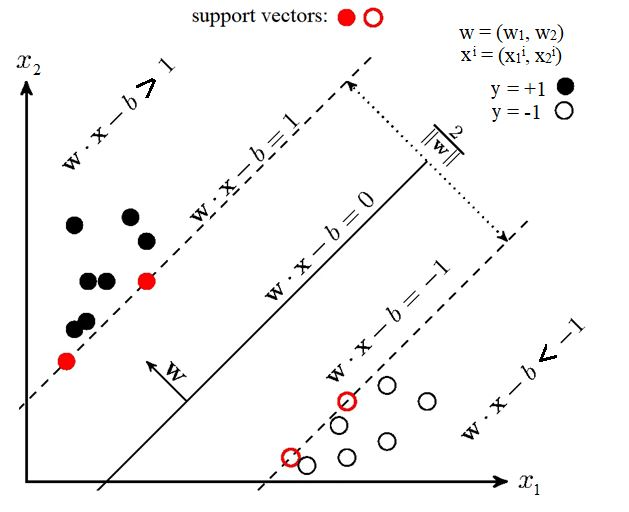

Теперь запишем формулу ширины окна между двумя ближайшими к гиперплоскости опорными векторами:

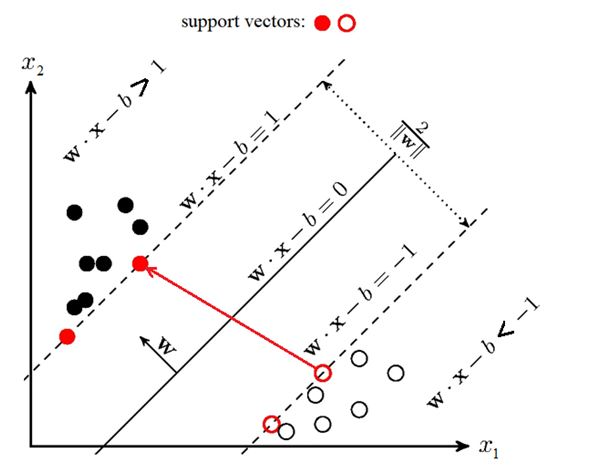

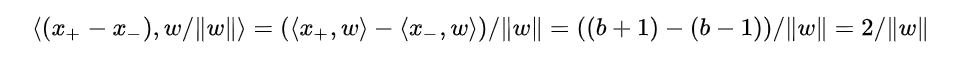

Получается, что 

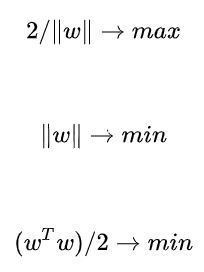

Или:

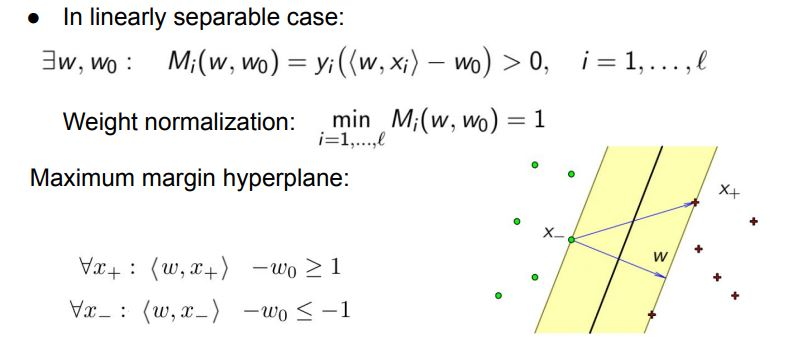

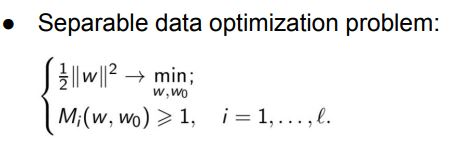

Но так можно записать лишь для идеального случая. Такой случай называется **hard-margin SVM**, когда никакому объекту не разрешается попадать на полосу разделения. Задача hard-margin решается аналитически через [теорему Куна-Таккера](SVM\lect004_svm_pca.pdf). Получаемая задача эквивалентна двойственной задаче поиска седловой точки функции Лагранжа.

На практике всегда найдется какой-нибудь объект, который втиснется куда угодно. На практике выборки линейно неразделимы. 

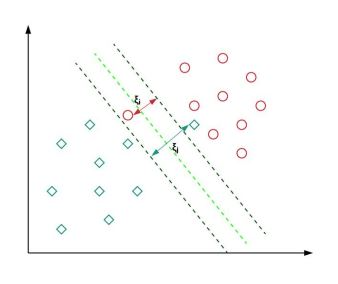

Чтобы алгоритм работал в этих случаях, позволим ему допускать ошибки на обучающих объектах, но при этом их должно быть как можно меньше. Для этого введём набор переменных $\varepsilon_{i} >= 0$, характеризующих величину ошибки и будем этой величиной штрафовать минимизирующий функционал. $\varepsilon_{i} >= 0$ означает расстояние от того опорного вектора, за которым объект должен находиться, но по какой-то причине находится в другом месте. Это проиллюстрировано на рисунке выше.

Тогда мы получим следующую систему: 

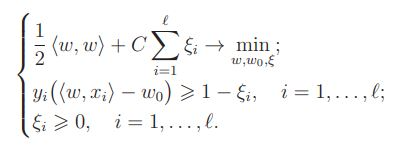

Из ограничений следует, что $ξi >= 0$ и $ξi >= 1−M_{i}$

Теперь нужно заставить модель подбирать наилучшую в данных условиях гиперплоскость. Для этого нужно обучить веса, а для обучения весов нужно ввести функцию потерь.

Первое, что приходит в голову, это просто посчитать количество ошибочных предсказаний, то есть:

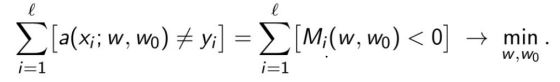

Но у нас есть возможность учесть не только сам факт $M_{i} < 0$, но и величину неправильного отступа, ведь мы можем записать: $M_{i}= 1−ξi$. Тогда:

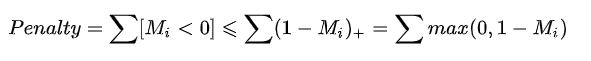

Почему мы хотим выбрать максимум между 0 и $1 - M_{i}$? Всё просто, если $1 - M_{i}$ < 0, то это значит, что объект классфифирован правильно и не входит в зазор. А нам не нужно наказывать модель за правильную классификацию. 

Такая функция потерь называется **Hinge-Loss** и выглядит следующим образом:

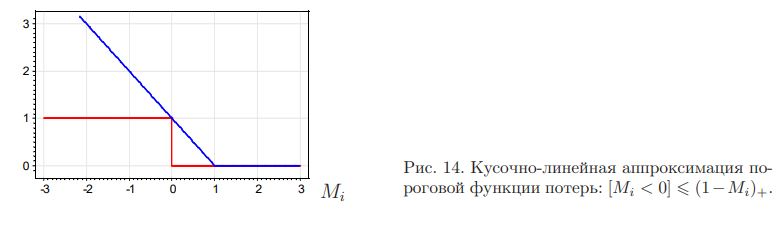

А итоговая функция потерь будет выглядеть так: 

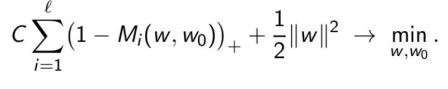

Таким образом, задача была сведена к безусловной оптимизации

Слагаемое с нормой вектора весов можно считать регуляризатором:

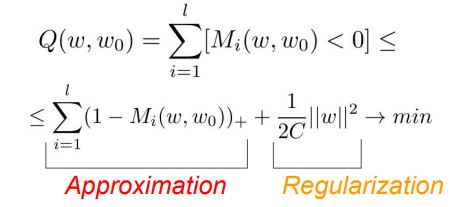

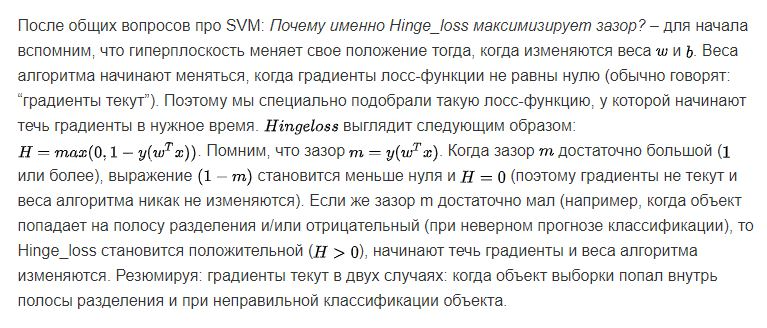

### Решение задачи:
Задача минимизации итогового функционала безусловная, а значит, можно обойтись без Лагранжа. Но можно решать и двойственню задачу, её я расписывать не буду, но она хорошо разобрана в [лекциях Воронцова](Text_lektsiy_kursa_Voron-ML-1.pdf). Применим для этой задачи градиентный спуск. 

Задача оптимизации SVM:

$$ \frac{1}{n} \sum_{i=1}^n \max(0, 1 - y_i (w X_i - b)) + \lambda ||w||_2 \to \min_w $$

Решаем с помощью градиентных методов.

## **2. Ядра и спрямляющие пространства**

Запишем двойственную задачу SVM:

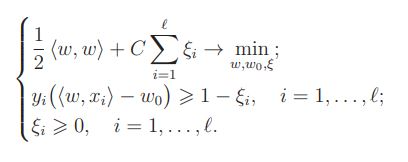

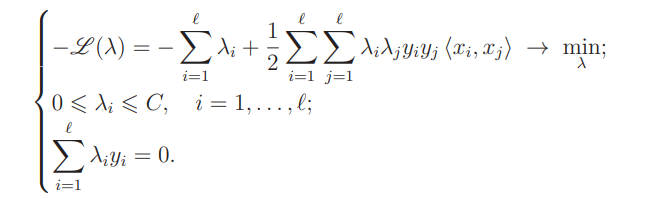

Решая данную задачу получим: 

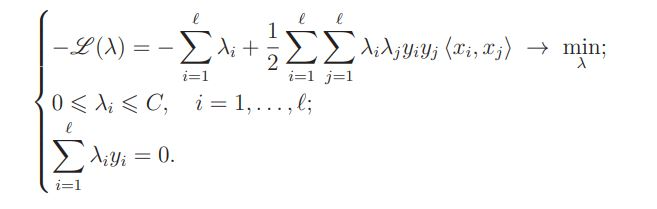

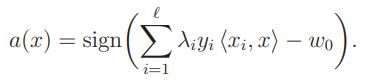

Заметим, что предсказание модели в итоге ависит от скалярного произведения обекта на все обхекты обучающей выборки. Но что если мы это скалярное произведение заменим на другое в другом прострастве. Допустим в нашем пространстве выборка линейно неразделима, но в том, куда мы перейдем она линейно разделима.

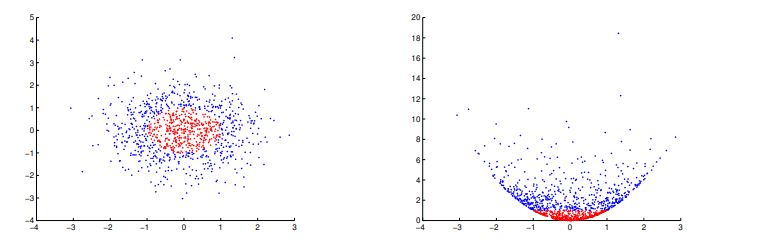

Вот простой пример. У нас были признаки x1 и x2, которые линейно неразделимы. Мы добавили $x_{3} = (x_{1})^2 + (x_{2})^2$ и вуа ля, теперь мы можем посмотреть, что обекты разных классов в пространстве x3 и x1 спокойно можно отделить друг от друга.

По сути, путём создания новых признаков мы переходим в новое пространство, в котором надеемся линейно разделить выборку.

Обозначим наш переход из одного признакового пространства в другое следующим образом: . Пространство H является спрямляющим. Так, получив новые признаки, можно дать определение ядру:

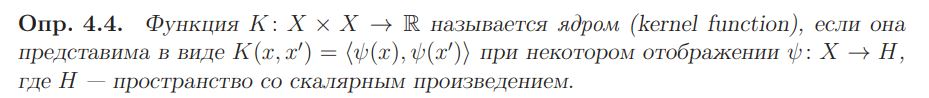

Вся прелесть ядер в том, что мы можем не строить спрямляющее пространство явно, то есть, не генерировать признаки. Мы можем взаимодействовать с нужным нам пространстовм самим ядром. 

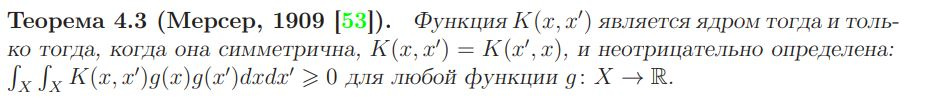

Существует множество ядер, среди коротых выделяется RBF или Гауссово ядро, которое прямиком приводит нас в бесконечномерное пространство. 

Я не пишу об этом подробно и в реализации ядер не будет (пока основной мой план не будет выполнен), потому что на данный момент ядерный SVM является мёртвым. Он не используется из-за того, что его заменили гораздо более быстрые и удобные ансамбли с деревьями. Однако всё может измениться, ведь ходят научные слухи, что любую неросеть можно представить в виде ядер, просто мы пока не умеем так делать, и кто знает, возможно до величайшего ядерного открытия осталось не так долго. 

Подробно про ядра, их приближения, плюсы и минусы написано [тут](SVM\lecture13-kernels.pdf) и [тут](SVM\lecture14-kernels.pdf), а также [тут](Text_lektsiy_kursa_Voron-ML-1.pdf). Это лекции Евгения Соколова (ВШЭ) b Константина Воронцова (МФТИ) - легенд в мире машинного обучения. Забавно, что у обоих фамилии связаны с птицами. Сокол из ВШЭ и ворон из МФТИ

## **3. Реализация модели на numpy**

In [1]:
import numpy as np

In [2]:
class CoolSVM:

    def __init__(self, learning_rate = 0.001, learn_iterations = 1000 , lambda_param = 0.01, kernel = "linear", gamma = 0.1):
        self.lyambda = lambda_param
        self.lr = learning_rate
        self.iters = learn_iterations
        self.g = gamma
        self.weights = None
        self.b = 0
        self.losses = []
        self.kernel = {
            "linear": lambda x_i: np.dot(x_i, self.weights),
            #"rbf": lambda x_i: np.exp(self.g*np.square(np.linalg.norm(self.weights - x_i)))

        }[kernel]

        self.losses = lambda p, y_i: (max(0, 1 - y_i*p) + self.lyambda*np.square(np.linalg.norm(self.weights)))

        self.los_grad = {
            "linear": lambda cond, y_i, x_i: self.lyambda*2*self.weights if cond else self.lyambda*2*self.weights - np.dot(x_i, y_i),
            #"rbf": lambda cond, y_i, x_i: self.lyambda*2*self.weights if cond else self.lyambda*2*self.weights - np.exp(self.g*np.square(np.linalg.norm(self.weights - x_i)))*2*(self.g)*(-x_i+self.weights)*y_i
        }[kernel]
    
    def fit(self, X, y):
        y_s = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        losses = []
        for _ in range(self.iters):
            loss = 0
            for id, x_i in enumerate(X):
                y_i = y_s[id]
                pred = self.kernel(x_i) - self.b
                loss += self.losses(pred, y_i)/n_samples
                margin = pred*y_i
                cond = margin >= 1
                grad = self.los_grad(cond, y_i, x_i)
                self.weights -= self.lr*grad
                if cond == False:
                    self.b -= self.lr*y_i
            losses.append(loss)
        self.losses = losses
    
    def predict(self, X):
        return np.sign(self.kernel(X) - self.b)

    def get_losses(self):
        return self.losses
    def get_weights(self):
        return self.weights

## **4. Проверка работы модели**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

SVM classification accuracy 0.8666666666666667


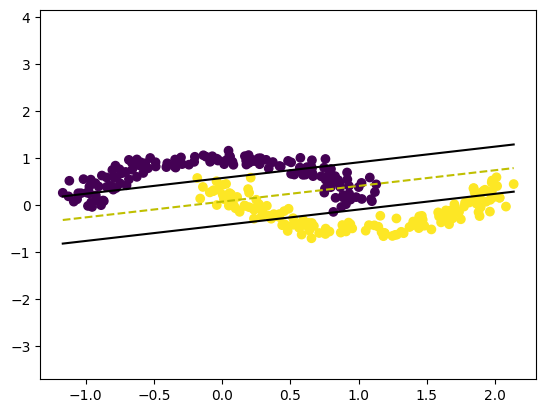

In [4]:
X, y = datasets.make_moons(
    n_samples=300, noise=0.1
)
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

clf = CoolSVM(kernel="linear", gamma=0.01, learning_rate= 0.01, learn_iterations=2000)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("SVM classification accuracy", accuracy(y_test, predictions))

def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.weights, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.weights, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.weights, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.weights, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.weights, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.weights, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()

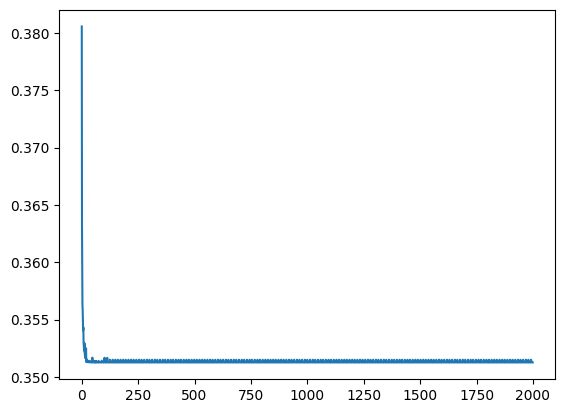

In [5]:
losses = clf.get_losses()

plt.plot(losses)

In [7]:
print(roc_auc_score(y_test, predictions))

0.8653198653198654


## **5. Сравнение с реализацией в sklearn**

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [9]:
from sklearn.svm import SVC

In [17]:
clf = SVC(kernel='rbf', C=1e6)
clf.fit(X, y)

SVC(C=1000000.0)

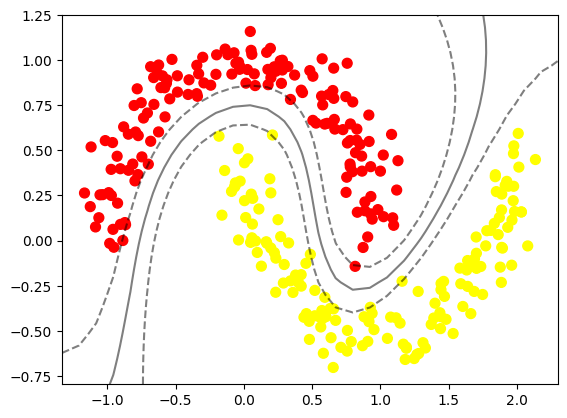

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

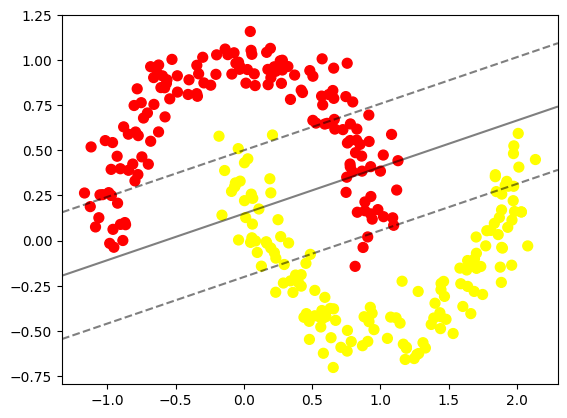

In [21]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

In [22]:
print(roc_auc_score(y_test, clf.predict(X_test)))

0.8838383838383839
